In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
from corr_func_tools import calc_wtheta, create_axes
import S4Mock_io
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table,vstack
import glob
import astropy.io.fits as fits
nbins=30

In [2]:
#mock_all with error bars 

wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_all.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

In [10]:
#real all 
#targ = S4Mock_io.read_mainsurvey_targets_bright()

#targ = targ[(targ['PHOTSYS']=='S')]
targ_small = targ[((targ['RA']>190) & (targ['RA']<200) & (targ['DEC']>60) & (targ['DEC']<70))]

targ_ran = S4Mock_io.read_desitargetrandoms()

targ_ran_small = targ_ran[((targ_ran['RA']>190) & (targ_ran['RA']<200) & (targ_ran['DEC']>60) & (targ_ran['DEC']<70))]

targ_wtheta =  calc_wtheta(targ_small['RA'],targ_small['DEC'],targ_ran_small['RA'],targ_ran_small['DEC'],nbins=nbins)

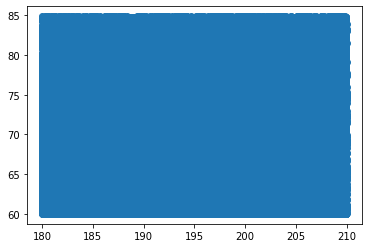

In [7]:
plt.scatter(targ_ran_small['RA'],targ_ran_small['DEC'])

In [5]:
#this is main survey area 
#np.save('wtheta_main',wtheta_main)
#wtheta_main = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_main.npy')

In [24]:
#mock fba files 
fassign = S4Mock_io.read_fassign_mock()
init_ledger = S4Mock_io.read_init_ledger()
fassign = fassign[np.in1d(fassign['TARGETID'],init_ledger['TARGETID'])]

sv3_rand = S4Mock_io.read_sv3_randoms(number=1)

wtheta_mock_fba = calc_wtheta(fassign['TARGET_RA'],fassign['TARGET_DEC'],sv3_rand['RA'],sv3_rand['DEC'])

In [25]:
#real fba files 

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_full.dat.fits')
dat = x[1].data
dat = dat[(dat['FIBERASSIGN_X']<1e20)]

x = fits.open('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/BGS_BRIGHT_0_full.ran.fits')
ran = x[1].data 

fba_wtheta = calc_wtheta(dat['RA'],dat['DEC'],ran['RA'],ran['DEC'],nbins=nbins)

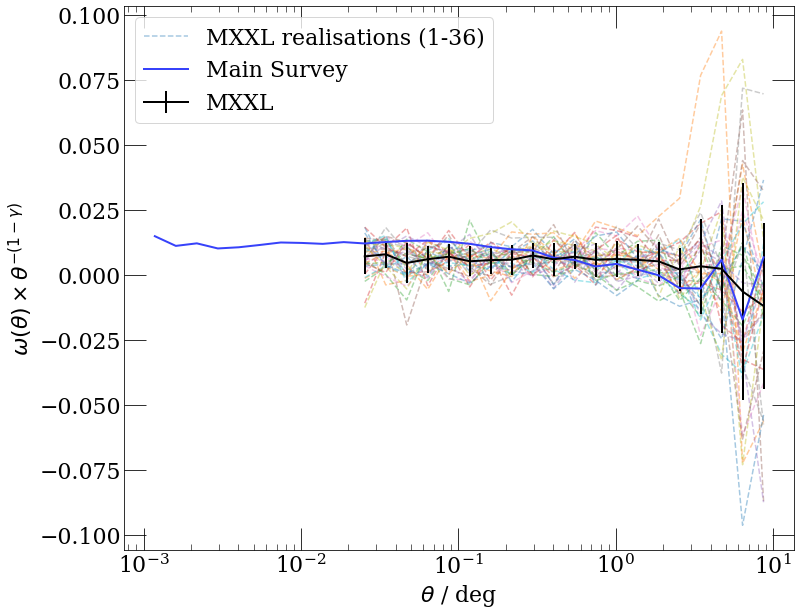

In [11]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)


#mxxl all

x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)


#real all
x_axis,y_axis = create_axes(targ_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2)


plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
plt.legend()

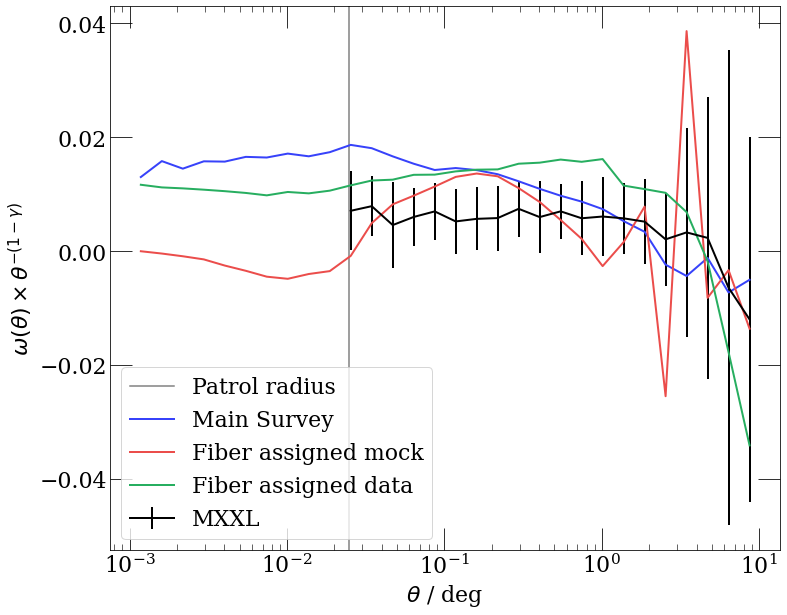

In [27]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

patrol_radii  = 1.48/60
plt.axvline(x=patrol_radii,color='grey',label='Patrol radius')

#mxxl all 
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)


#real all
x_axis,y_axis = create_axes(targ_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2)

#mock fba 
x_axis_fba,y_axis_fba = create_axes(wtheta_mock_fba)

plt.plot(x_axis_fba,y_axis_fba,color= '#eb4d4b',label='Fiber assigned mock',zorder=3,linewidth=2)

#real fba 
x_axis_fba,y_axis_fba = create_axes(fba_wtheta)

plt.plot(x_axis_fba,y_axis_fba,color= '#27ae60',label='Fiber assigned data',zorder=3,linewidth=2)


plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
plt.legend()

<Figure size 864x720 with 0 Axes>

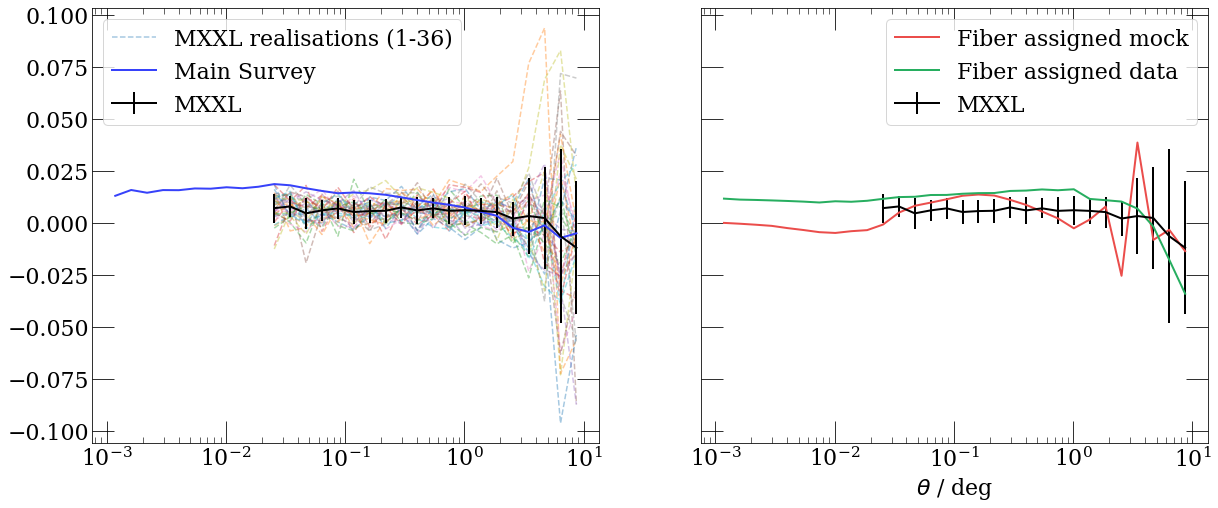

In [28]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,8),sharex=True,sharey=True)

x_axis1,y_axis1 = create_axes(wtheta_all[0])
ax1.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    ax1.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

ax1.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)
ax2.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL',zorder=3,linewidth=2)

x_axis,y_axis = create_axes(targ_wtheta)

ax1.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2)

x_axis_fba,y_axis_fba = create_axes(wtheta_mock_fba)

ax2.plot(x_axis_fba,y_axis_fba,color= '#eb4d4b',label='Fiber assigned mock',zorder=3,linewidth=2)

x_axis_fba,y_axis_fba = create_axes(fba_wtheta)

ax2.plot(x_axis_fba,y_axis_fba,color= '#27ae60',label='Fiber assigned data',zorder=3,linewidth=2)

plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
ax1.legend()
ax2.legend()